In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [2]:
with open('/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z14_180223_0x0004_100M.pkl','rb') as readFile:
      data=pickle.load(readFile,encoding='latin1')

print(data.keys())

dict_keys(['prim_KE', 'prim_Z', 'prim_Y', 'prim_X', 'NRYield', 'cap_Zmom', 'totalevents', 'cap_Xmom', 'ERYield', 'ERt', 'cap_X', 'cap_Y', 'nprim', 'ERx', 'ERy', 'ERz', 'ERedep', 'NRedep', 'cap_Time', 'prim_PType', 'prim_Xmom', 'prim_Ymom', 'NRhit', 'ERhit', 'NRz', 'NRy', 'NRx', 'cap_Ymom', 'NRt', 'cERcapProg', 'prim_Zmom', 'cap_KE', 'ncap', 'cap_Z', 'cNRcapProg'])


In [3]:
print(np.arange(data['NRhit'][0]))
print(data['NRedep'][0][np.arange(np.int(data['NRhit'][0]))])
print(data['ERedep'][0][np.arange(np.int(data['ERhit'][0]))])
print(data['totalevents'])

[0 1 2]
[ 202.72575784  232.5220994    27.31462882]
[]
102001000


In [4]:
print(np.shape(data['cNRcapProg']))
print(np.shape(data['NRedep']))

(39185, 13)
(39185, 13)


In [5]:
NRedep_nocap = data['NRedep']
#NRedep_nocap[data['cNRcapProg']] = 0
print(np.shape(NRedep_nocap))

(39185, 13)


In [6]:
#trying to customize here, see:
#https://matplotlib.org/users/customizing.html
#matplotlib.rc('figure', figsize=(3.4, 3.4*(4/6)))
mpl.rcParams['lines.linewidth'] = 2

#ticks
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 22

mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 22


#error bars
#mpl.rcParams['errorbar.capsize'] = 3

#axis stuff
mpl.rcParams['axes.labelsize'] = 22

#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

In [7]:
#might as well make some 1d histograms of energy stuff

emax = 1000
edepNR = np.sum(data['NRedep'],1)
#print(data['NRedep'][151])
#print(np.shape(edepNR[(data['ERhit']==0) & (data['ncap']>0)]))
#print(data['NRhit'][data['ncap']>0])
#print(edepNR[data['ncap']==1])
#print(data['NRedep'][data['ncap']==1])
#print(np.shape(edepNR[(data['ERhit']==0) & (data['NRhit']>0)]))
n,nx = np.histogram(edepNR[(data['ERhit']==0) & (data['NRhit']>0)],100,range=(0,emax))
#n,nx = np.histogram(KE[bcuts['cOVCLidA']],300,range=(0,emax))
nerr = np.sqrt(n)
xc = (nx[:-1] + nx[1:]) / 2

n_cap,nx_cap = np.histogram(edepNR[(data['ERhit']==0) & (data['NRhit']>0) & (data['ncap']>0)],100,range=(0,emax))
#n,nx = np.histogram(KE[bcuts['cOVCLidA']],300,range=(0,emax))
nerr_cap = np.sqrt(n_cap)
xc_cap = (nx_cap[:-1] + nx_cap[1:]) / 2

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)

#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
norm = 1/np.float(data['totalevents']) #per neutron
print(norm)
width = xc[1]-xc[0] #width in eV
print(width)
norm = norm/width #per neutron per eV
print(norm)
srcrate = 3.7e7/1.0e5 #n per second
srcrate = srcrate*(24*60*60) #n per day
norm = norm*srcrate
print(norm)

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
ax1.step(xc,n*norm, where='mid',color=rgb_r, linestyle='-', label='all NRs', linewidth=2)
ax1.step(xc_cap,n_cap*norm, where='mid',color=rgb_b, linestyle='-', label='captures', linewidth=2)

ymin = 1e-1*norm
ymax = 1e5*norm

thresh=350.
sigthr=20. # sigma on threshold
a = [thresh,thresh] #this was the threshold for IT5Z2 :
#http://titus.stanford.edu/cdms_restricted/Soudan/R133/ebook/171012_AS/T5Z2liteTrigEff.html
b = [ymin,ymax]
#ax1.plot(a,b,linestyle='--',color='k',label='_nolegend_')
#ax1.plot(a,b,linestyle='--',color='k',label='Thresh. (IT5Z2) in keV$_{\mathrm{nr}}$')

ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label="Thresh. (IT5Z2), keV$_{\mathrm{nr}}$")
erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
ax1.fill_between(erange_x, ymin, ymax, facecolor=rgb_o, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('NR energy [eV]',**axis_font)
ax1.set_ylabel('rate [(eV $\cdot$ day)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=1,prop={'size':22})

9.80382545269164e-09
10.0
9.80382545269e-10
0.0313408692072


In [9]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

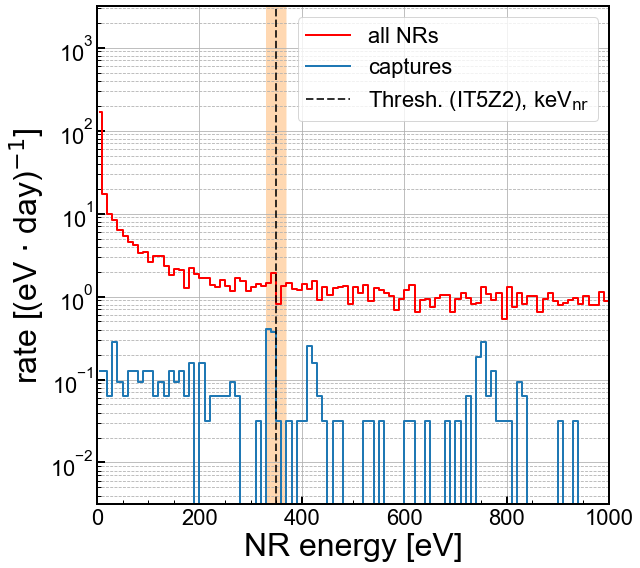

In [10]:
plt.tight_layout()
plt.savefig('figures/IT5Z2_G4captures_100M.eps')
plt.show()

In [11]:
with open('/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z14_180301_cap_slow.pkl','rb') as readFile:
      cap=pickle.load(readFile,encoding='latin1')

print(cap.keys())

dict_keys(['NRy', 'ERt', 'ERYield', 'NRYield', 'ERy', 'NRhit', 'cERcapProg', 'ERx', 'ERhit', 'totalevents', 'ERedep', 'NRz', 'NRedep', 'NRx', 'ERz', 'cNRcapProg', 'cEscape', 'ncap', 'NRt', 'nprim'])


In [12]:
print(np.shape(edepNR[(data['ERhit']==0) & (data['NRhit']>0) & (data['ncap']>0)]))

(198,)


In [13]:
#take the number of total captures (with or without ER)
oneper = np.ones(np.shape(data['ncap']))
Ncap = np.sum(oneper[data['ncap']>0])
print(Ncap)

#go ahead and pick out this many events from the capture file
idx = np.arange(np.shape(cap['NRedep'])[0])
idx_rand = np.random.choice(idx,np.int(Ncap),replace=False)
edepNR_cap = np.sum(cap['NRedep'],1)
edepNR_cap[~cap['cEscape']] = 1e9 #set any non-escaper as a GeV event
edepNR_cap_reduced = edepNR_cap[idx_rand]
#edepNR_cap_reduced = edepNR_cap
print(np.shape(edepNR_cap_reduced))
print(edepNR_cap_reduced)
print(np.sum(np.ones(np.shape(cap['NRedep'])[0])[cap['cEscape']]))

#make the new capture histogram
n_cap_new,nx_cap_new = np.histogram(edepNR_cap_reduced,100,range=(0,emax))

1170.0
(1170,)
[  1.00000000e+09   3.70046078e+02   2.80617149e+02 ...,   2.54149697e+02
   2.15822759e+02   1.82058237e+02]
8068.0


In [14]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)

#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
norm = 1/np.float(data['totalevents']) #per neutron
print(norm)
width = xc[1]-xc[0] #width in eV
print(width)
norm = norm/width #per neutron per eV
print(norm)
srcrate = 3.7e7/1.0e5 #n per second
srcrate = srcrate*(24*60*60) #n per day
norm = norm*srcrate
print(norm)

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
ax1.step(xc,(n-n_cap)*norm, where='mid',color=rgb_r, linestyle='-', label='all NRs (no capture)', linewidth=2)
ax1.step(xc_cap,n_cap_new*norm, where='mid',color=rgb_b, linestyle='-', label='re-sim captures', linewidth=2)

ymin = 1e-1*norm
ymax = 1e5*norm

thresh=350.
sigthr=20. # sigma on threshold
a = [thresh,thresh] #this was the threshold for IT5Z2 :
#http://titus.stanford.edu/cdms_restricted/Soudan/R133/ebook/171012_AS/T5Z2liteTrigEff.html
b = [ymin,ymax]
#ax1.plot(a,b,linestyle='--',color='k',label='_nolegend_')
#ax1.plot(a,b,linestyle='--',color='k',label='Thresh. (IT5Z2) in keV$_{\mathrm{nr}}$')

ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label="Thresh. (IT5Z2), keV$_{\mathrm{nr}}$")
erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
ax1.fill_between(erange_x, ymin, ymax, facecolor=rgb_o, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('NR energy [eV]',**axis_font)
ax1.set_ylabel('rate [(eV $\cdot$ day)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=1,prop={'size':22})

9.80382545269164e-09
10.0
9.80382545269e-10
0.0313408692072


In [15]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

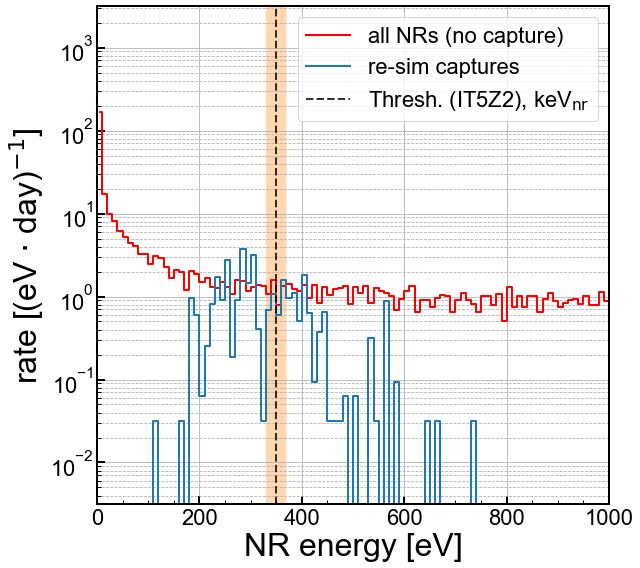

In [16]:
plt.tight_layout()
plt.savefig('figures/IT5Z2_RealSimcaptures_100M.eps')
plt.show()